# First Project Work Week Assignment



### Business Understanding

<font color='blue'>
_Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific._
</font>

__Goal__

Predict default yes/no given the data.

 - Can we predict with X level of confidence?
 - Can I (something something banking jargon) interest rates (Paul will fill out)
 - Maximize sensitivity even if false positives.
 - Logistic Regression?
 - Sensitivity and Specificity (Need to determine what level is appropriate?)

20% of the observations are default scenarios

### Data Meaning Type

<font color='blue'>
_Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file._
</font>

#### Attribute Information

This data set was attained from the UCI Machine Learning Repository. It is a 6 month history of 30,000 Taiwanese credit account balances and transactions.

Each observation contains a binary reponse variable "default" with values 1 indicating a default occured and 0 indicating no default occured.

The following explanatory variables are included:

 - LIMIT_BAL = Total credit amount allowed
 
 - SEX
     -  1 = Male
     -  2 = Female
 
 - EDUCATION
     - 1 = Graduate School
     - 2 = University
     - 3 = High School
     - 4 = Other
   
 - MARRIAGE
     - 1 = Married
     - 2 = Single
     - 3 = Other
       
 - AGE = Credit holder age in years
 
Payment history (2005)
 - PAY_0 = September
 - PAY_2 = August
 - PAY_3 = July
 - PAY_4 = June
 - PAY_5 = May
 - PAY_6 = April
      -  -1 = payment received on time
      -   1 = payment received one month late
      -   2 = payment received two months late
      -   "......"
      -   9 = payment received nine months late or more
         
Statement amount (NT dollars, 2005)
 - BILL_AMT1 = September
 - BILL_AMT2 = August
 - BILL_AMT3 = July
 - BILL_AMT4 = June
 - BILL_AMT5 = May
 - BILL_AMT6 = April
 
Previous Payment (NT dollars, 2005).
 - PAY_AMT1 = September
 - PAY_AMT2 = August
 - PAY_AMT3 = July
 - PAY_AMT4 = June
 - PAY_AMT5 = May
 - PAY_AMT6 = April

Original Source Data Set Information  
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

In [1]:
#import the data
import pandas as pd
df = pd.read_csv('Input/DefaultCreditcardClients.csv')
df.rename(columns={'default payment next month':'default'}, inplace=True)
df.index = df.ID
if 'ID' in df:
    del df['ID']
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Pandas defaulted all data types to integer.
The source has no explicit data type descriptions but there is enough context to safely change the datatypes of all continuous variables to floats.

In [2]:
import numpy as np

# Change numeric values to floats
continuous_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
                       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                       'PAY_AMT6']

ordinal_features = ['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

df[continuous_features] = df[continuous_features].astype(np.float64)
df[ordinal_features] = df[ordinal_features].astype(np.int64)

#categ_features = ['SEX', 'default']
#df[categ_features] = df[categ_features].astype(np.object)



### Data Quality

<font color='blue'>
_Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods._

</font>


In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


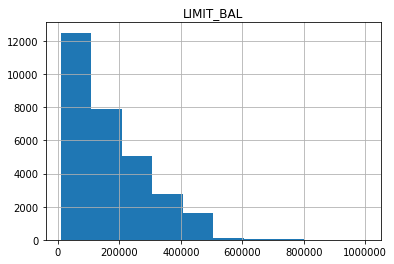

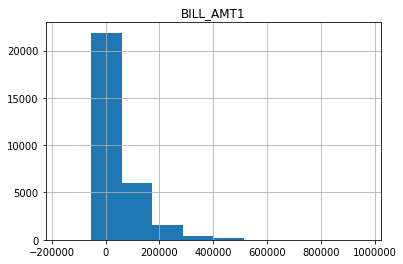

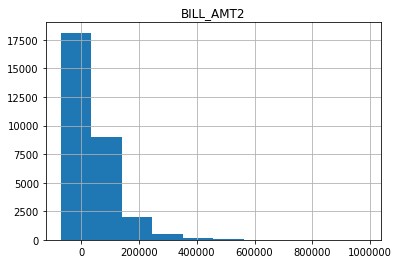

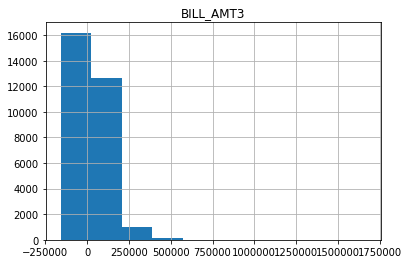

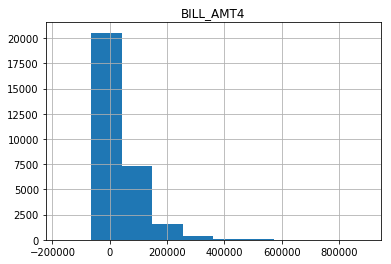

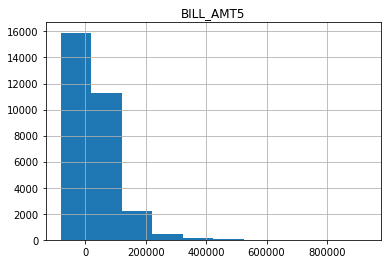

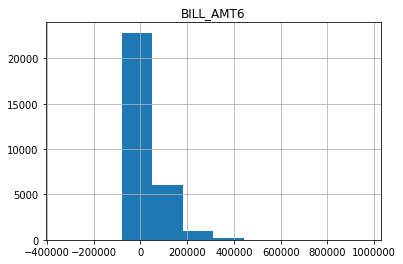

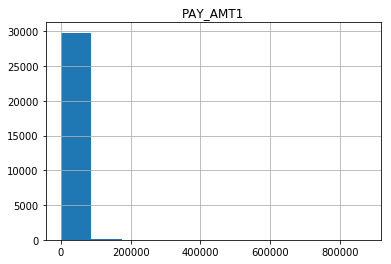

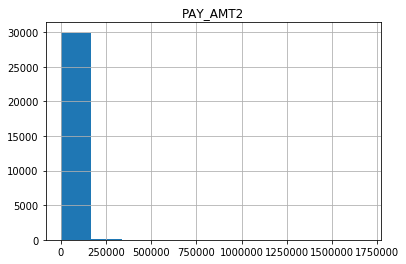

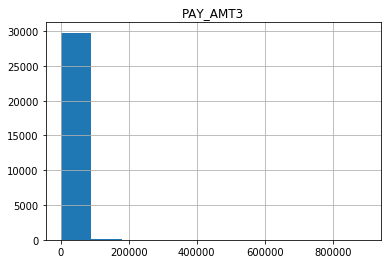

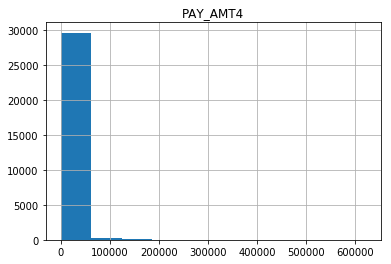

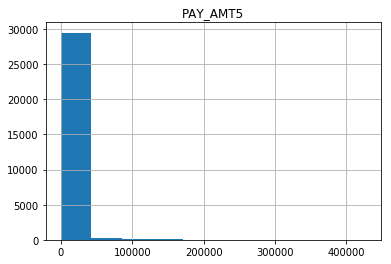

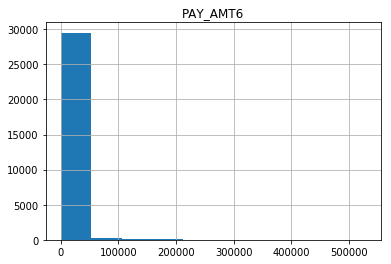

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
lb = df.hist(['LIMIT_BAL'])
ba1 = df.hist(['BILL_AMT1'])
ba2 = df.hist(['BILL_AMT2'])
ba3 = df.hist(['BILL_AMT3'])
ba4 = df.hist(['BILL_AMT4']) 
ba5 = df.hist(['BILL_AMT5'])
ba6 = df.hist(['BILL_AMT6'])
pa1 = df.hist(['PAY_AMT1'])
pa2 = df.hist(['PAY_AMT2'])
pa3 = df.hist(['PAY_AMT3'])
pa4 = df.hist(['PAY_AMT4'])
pa5 = df.hist(['PAY_AMT5'])
pa6 = df.hist(['PAY_AMT6'])

#look at records (maybe 18 and 19) there were not sensical - delinquent payments but no balance due. Maybe about 17 of these.

In [5]:
dfs=df.sample(n=300, replace=False)

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
sns.pairplot(dfs, hue="default", size=2)

# from pandas.plotting import scatter_matrix
# ax = scatter_matrix(dfs,figsize=(50,50))

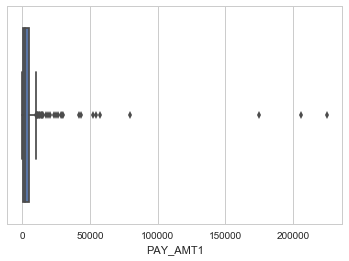

In [7]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=dfs['PAY_AMT1'])

### Simple Statistics

In [8]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The table above shows the simple statistics for all the variables in the data set. We can see that the average person is 35 years old woman, who graduated school and pays her bills in time.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
# find the percentage of people who were default
percentDefault = float(len(df[df.default != 0]))/len(df) * 100
print (percentDefault)

22.12


The percentage of people who were default in the data set is 22.12% and it matches the calculation from the data frame describe() function in the table above.

In [10]:
df.groupby(by=df.default).mean()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [11]:
(130109.65-178099.72)/178099.72

-0.26945617881937156

The amount of the given credit (LIMIT_BAL) for people, who default payment next month, is lower by 26.94% compering with those, who Not default payment next month. History of past payment in the above table (PAY_0 - PAY_6) confirms the ability to pay in time for peple who are not fail to make payment next month.

In [12]:
df.groupby(by=df.EDUCATION).mean()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,217142.857143,1.428571,1.714286,38.857143,-0.500000,-1.000000,-0.928571,-0.857143,-1.071429,-1.357143,...,13350.214286,7409.071429,5272.928571,5945.785714,13030.928571,8825.142857,3620.571429,2541.714286,3007.214286,0.000000
1,212956.069910,1.588663,1.652338,34.231838,-0.233916,-0.408125,-0.425886,-0.461974,-0.479074,-0.485971,...,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842,0.192348
2,147062.437634,1.616964,1.523022,34.722096,0.102210,0.022523,-0.018532,-0.083036,-0.141411,-0.170848,...,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028,0.237349
3,126550.270490,1.595282,1.421192,40.299980,0.132805,0.040879,0.002644,-0.066504,-0.139313,-0.183649,...,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034,0.251576
4,220894.308943,1.658537,1.601626,33.853659,-0.504065,-0.772358,-0.764228,-0.813008,-0.780488,-0.739837,...,39570.268293,33840.113821,32136.130081,5450.512195,6555.008130,9990.626016,5104.861789,5991.642276,4284.967480,0.056911
5,168164.285714,1.660714,1.475000,35.600000,-0.121429,-0.303571,-0.375000,-0.375000,-0.389286,-0.521429,...,62275.767857,53568.014286,46083.860714,5970.714286,8912.921429,7718.510714,4927.332143,4633.246429,7772.114286,0.064286
6,148235.294118,1.509804,1.490196,43.901961,-0.176471,-0.313725,-0.372549,-0.411765,-0.509804,-0.647059,...,54259.490196,44510.745098,39578.509804,9780.450980,6176.431373,7644.941176,5179.490196,11691.137255,14773.901961,0.156863


The highest percent of default payment is 25.15% for people who graduated only a high school.

### Visualize Attributes

In [13]:
#pythoncode

### Explore Joint Attributes

<font color='blue'>
_Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships._
</font>


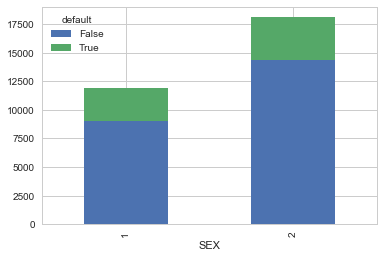

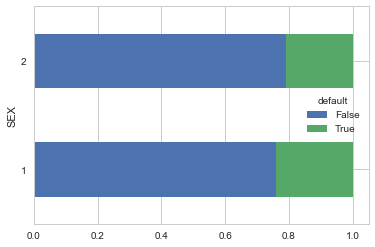

In [14]:
Default_counts = pd.crosstab([df['SEX']], df.default.astype(bool))
# Default_counts.plot(kind='bar', stacked=True, color=['grey','blue'])
Default_counts.plot(kind='bar', stacked=True)

# divide the counts to get rates
Default_rate = Default_counts.div(Default_counts.sum(1).astype(float),axis=0)
# Default_rate.plot(kind='barh', stacked=True, color=['grey','blue'])
Default_rate.plot(kind='barh', stacked=True)

It is interesting that persent of default payments is higher for man than for female. On the plot above we see 20% of defaul payments which makes woman versus 25% which makes man

<bound method _AxesBase.set_yscale of <matplotlib.axes._subplots.AxesSubplot object at 0x00000236236DB550>>

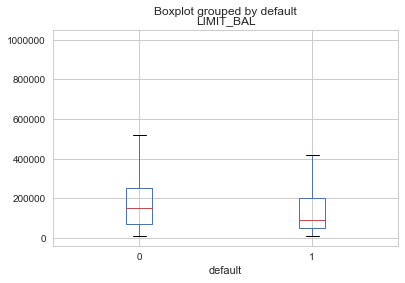

In [15]:
# import seaborn as sns
# sns.set(style="whitegrid")
# ax = sns.boxplot(x=df['LIMIT_BAL'])

a = df.boxplot(column='LIMIT_BAL', by = 'default')
a.set_yscale

The boxplot above confirms our finding that amount of the given credit (LIMIT_BAL) for people, who default payment next month, is lower by 26.94% compering with those, who Not default payment next month.

<bound method _AxesBase.set_yscale of <matplotlib.axes._subplots.AxesSubplot object at 0x000002362374D7F0>>

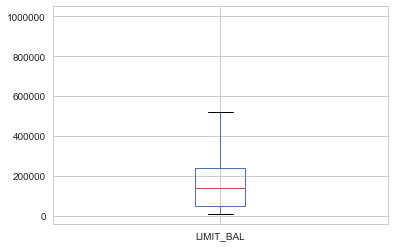

In [16]:
b = df.boxplot(column='LIMIT_BAL')
b.set_yscale

From the boxplot we see that for the 90% of the data max amount of the given credit is around $500,000. Observations with LIMIT_BAL higher than $500,000 are outliers. The medium LIMIT_BAL is around $120,000.

<bound method _AxesBase.set_yscale of <matplotlib.axes._subplots.AxesSubplot object at 0x00000236237970F0>>

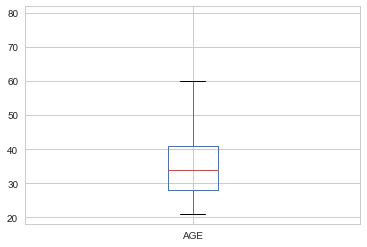

In [17]:
c = df.boxplot(column='AGE')
c.set_yscale

90% of the ages is in the interval (21, 60). The rest observations with ages higher than 60 years are outliers. Mean age is 35 years.

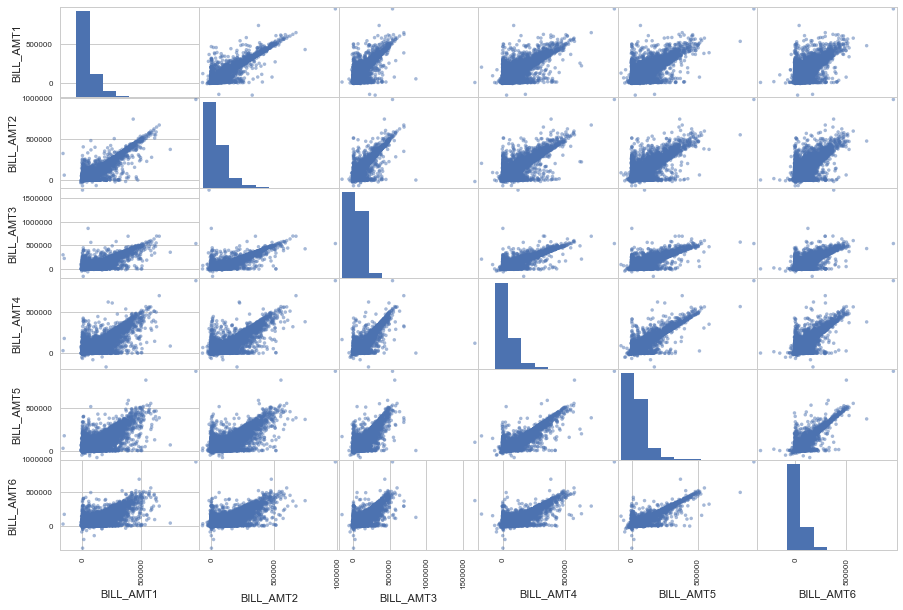

In [18]:
from pandas.plotting import scatter_matrix
ax=scatter_matrix(df[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]], figsize=(15,10))

We see on the scatter matrix high correlation between amounts of bill statements. All BILL_AMT distributions are right skewed.

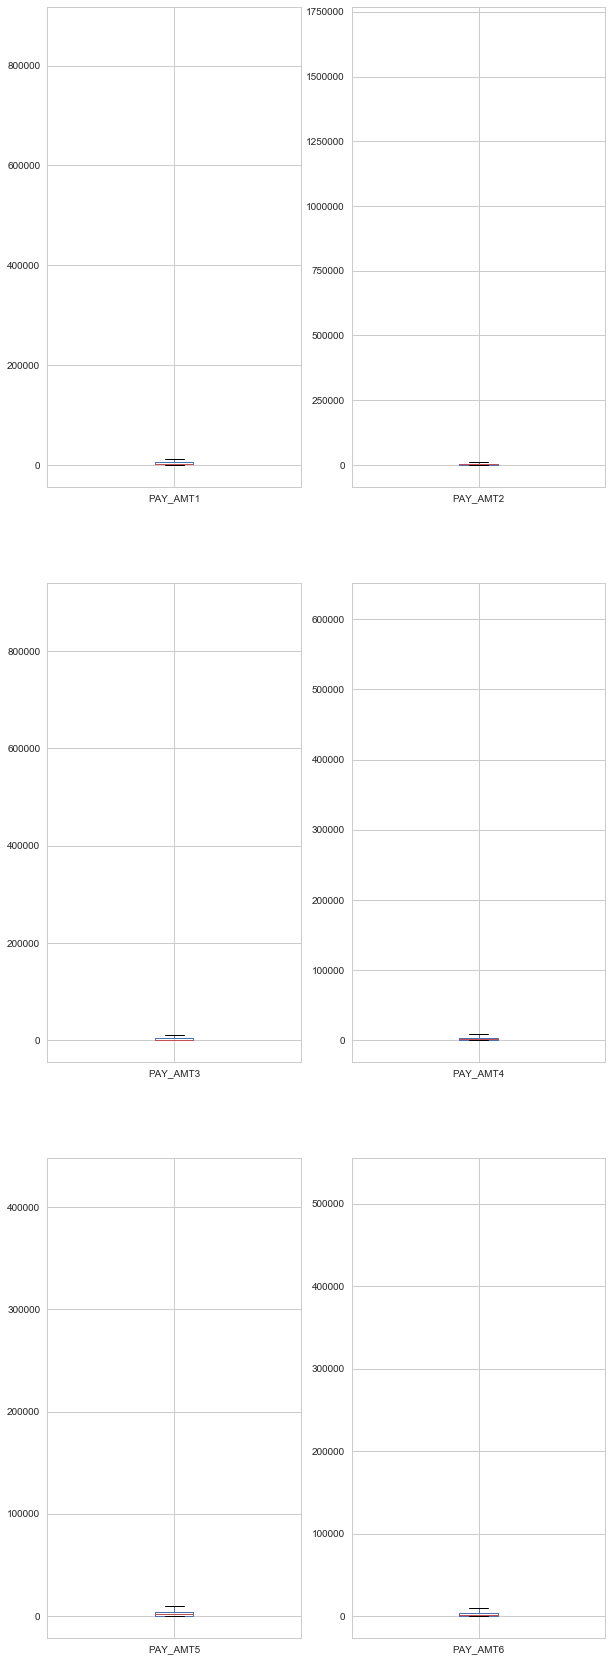

In [19]:
vars_to_plot_separate = [['PAY_AMT1'],['PAY_AMT2'],['PAY_AMT3'],['PAY_AMT4'],['PAY_AMT5'],['PAY_AMT6']]
plt.figure(figsize=(10,30))
for index, plot_vars in enumerate (vars_to_plot_separate):
    plt.subplot(len(vars_to_plot_separate)/2,
               2,
               index+1)
    ax=df.boxplot(column=plot_vars)
    
plt.show()

We see a lot of outliers in amounts of previous payments (PAY_AMT).

Text(0.5,1,'PAY_AMT6 no outlier')

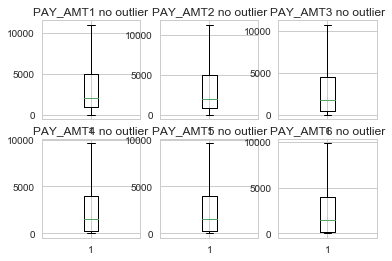

In [20]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].boxplot(df.PAY_AMT1, 0, '')
axs[0, 0].set_title("PAY_AMT1 no outlier")
axs[0, 1].boxplot(df.PAY_AMT2, 0, '')
axs[0, 1].set_title("PAY_AMT2 no outlier")
axs[0, 2].boxplot(df.PAY_AMT3, 0, '')
axs[0, 2].set_title("PAY_AMT3 no outlier")
axs[1, 0].boxplot(df.PAY_AMT4, 0, '')
axs[1, 0].set_title("PAY_AMT4 no outlier")
axs[1, 1].boxplot(df.PAY_AMT4, 0, '')
axs[1, 1].set_title("PAY_AMT5 no outlier")
axs[1, 2].boxplot(df.PAY_AMT6, 0, '')
axs[1, 2].set_title("PAY_AMT6 no outlier")

And from above plots it is clear that 90% of the payments are in the interval ($0, $10,000).

### Explore Attributes and Class

In this section we review the various relationships between our various features and there relationship to our target class (default =1). This will allow us to understand certain features or potentially identify new features for use in our model.

We began by exploring the relationships between the available demographic data to the default class.

##### _Customer Demographics and Default_

In [21]:
#do some transformations
#convert any non-identified education categories to 'OTHER'
df['EDUCATION'] = df['EDUCATION'].replace(to_replace=(0,5,6),value=4)

#convert any non-identified marriage categories to 'OTHER'
df['MARRIAGE'] = df['MARRIAGE'].replace(to_replace=(0),value=3)

#calculate the credit usage values
df['USAGE_1'] = df['BILL_AMT1']/df['LIMIT_BAL']
df['USAGE_2'] = df['BILL_AMT2']/df['LIMIT_BAL']
df['USAGE_3'] = df['BILL_AMT3']/df['LIMIT_BAL']
df['USAGE_4'] = df['BILL_AMT4']/df['LIMIT_BAL']
df['USAGE_5'] = df['BILL_AMT5']/df['LIMIT_BAL']
df['USAGE_6'] = df['BILL_AMT6']/df['LIMIT_BAL']

payments = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df['TotalMonthsLate'] = df[payments].sum(axis=1)
#transform continuous variables as they each have a mostly exponential distribution
df[continuous_features] = df[continuous_features].replace(to_replace=0,value=np.nan).apply(np.log)

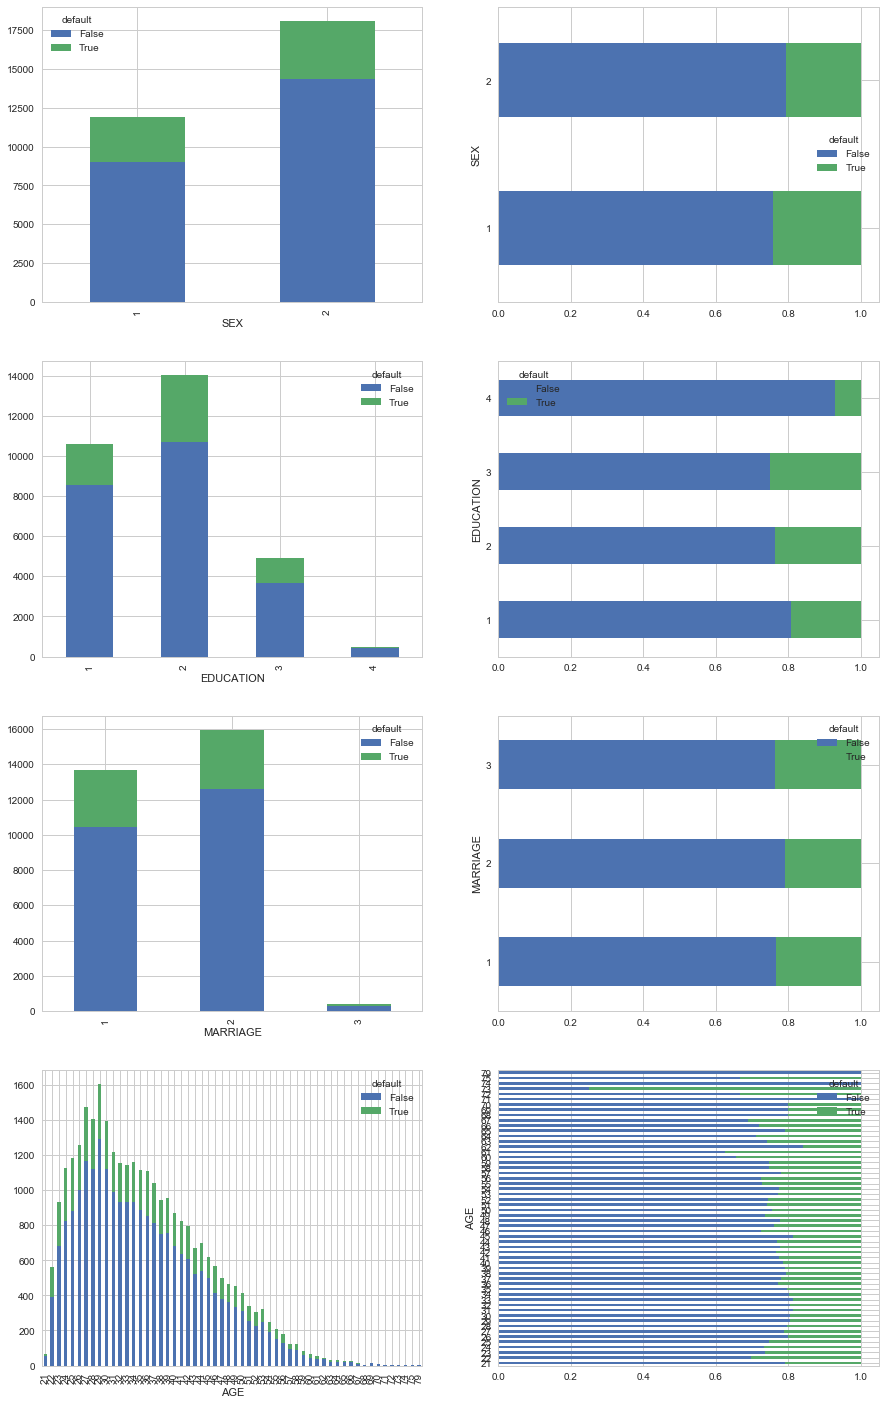

In [22]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
# cross tabs provide a quick view of the relationships between characteristics of the borrower & our target
plotVar = ['SEX','EDUCATION','MARRIAGE','AGE']

fig, axes = plt.subplots(nrows=len(plotVar), ncols=2, figsize=(15, 25))

for fi,feature in enumerate(plotVar):
    Counts = pd.crosstab(df[feature],df.default.astype(bool))
    Counts.plot(kind='bar', stacked=True, ax=axes[fi,0])
    
    Rate = Counts.div(Counts.sum(1).astype(float),axis=0)
    Rate.plot(kind='barh', stacked=True, ax=axes[fi,1])
    
plt.show()

After reviewing the features from above there are a couple relationships that stand out when comparing the demographic features and the proportion of defaults for our sample. The review of this data below simply addresses the variable relationships to the default class. It does not address the potential ethical concerns of using a customer's demographic information to influence a banks decision on credit limits or interest rates.

Sex
- There does appear to be a noticeable difference in the default rates by gender based on a visual inspections. 

Education
- There does seem to pattern between the amount of education people receive and the default rates. Based on the visual inspection of the above data there is some indication that people with higher levels of education default at lower rates.

Marriage
- There does not seem to be any obvious discernable trends based on Marital Status

Age:
- Based on the age variables there is potentially some indications that people in there early 20's are more succeptible to defaulting, however this variable may need to be bucketed differently to better interpret the succeptible age groups. We will cover this in our 'New Features' section.

##### _Payment History and Default_

After looking through the customers demographic history we wanted to explore the relationships between the customers bill payment history to identify any patterns that emerge.

We begin with the relationship between prior payment status (late payments vs ontime)

Text(0,0.5,'Average Months Behind Payment Due Date')

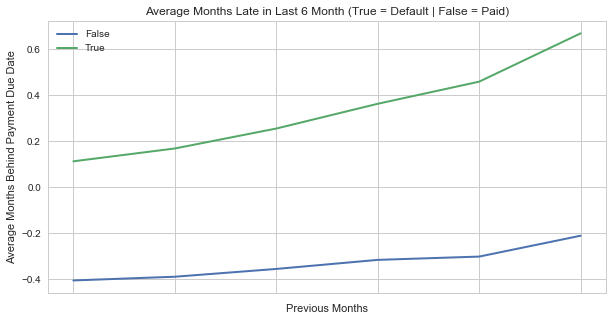

In [23]:
plotVar = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default']
plotDF = df[plotVar]

meanDF = plotDF.groupby(by='default').mean().T.reset_index()
meanDF['Month'] = [9,8,7,6,5,4]
meanDF.columns = ['PreviousMonths', 'False', 'True', 'Month']
meanDF = meanDF.sort_values(by=['Month'], ascending=True)

meanDF.plot(x='PreviousMonths', y=['False', 'True'], figsize=(10,5), grid=True, lw = 2)
plt.title('Average Months Late in Last 6 Month (True = Default | False = Paid)')
plt.xlabel('Previous Months')
plt.ylabel('Average Months Behind Payment Due Date')



From above the customers that defaulted paid there previous bill between .2 to .7 months late on average. Additionally, it appears that as we move closer to the month we are predicting(left to right), the timeliness of the bill payments seems to be getting worse for both groups.

Logically we interpret this to support the notion that people who have trouble paying there previous bills will likely have similar difficulties paying in the future. 

This lends to the potential for a new features that better captures the timeliness of previous payments as well as the status of the last payment (paid or still outstanding).

In order to understand why, we will look at the average of the log transformed bill amounts to see if there is any identifiable pattern.

Text(0,0.5,'Average Log(Bill Amt)')

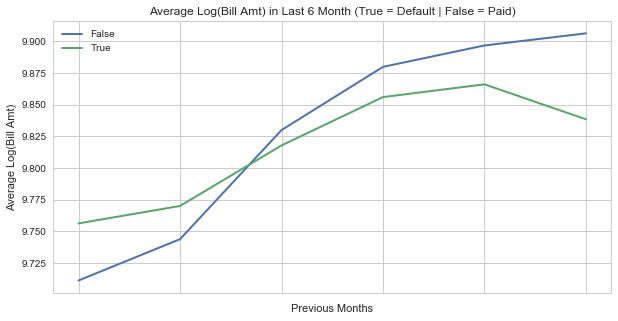

In [24]:
plotVar = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','default']
plotDF = df[plotVar]

meanDF = plotDF.groupby(by='default').mean().T.reset_index()
meanDF['Month'] = [9,8,7,6,5,4]
meanDF.columns = ['PreviousMonths', 'False', 'True', 'Month']
meanDF = meanDF.sort_values(by=['Month'], ascending=True)

meanDF.plot(x='PreviousMonths', y=['False', 'True'], figsize=(10,5), grid=True, lw = 2)
plt.title('Average Log(Bill Amt) in Last 6 Month (True = Default | False = Paid)')
plt.xlabel('Previous Months')
plt.ylabel('Average Log(Bill Amt)')

Interestingly, when looking at the bill amount from the previous months there does not seem to be a considerable difference between the median bill amount between customers that default and those that don't. 

Based on this it would seem that the actual bill amount by itself will offer little insight into the likelihood of default. This is perhaps an indication that it should be considered relative to the total available credit and the prior payments. 

Next we look deeper that log transformed payment amounts.

Text(0,0.5,'Average Log(Pay Amt)')

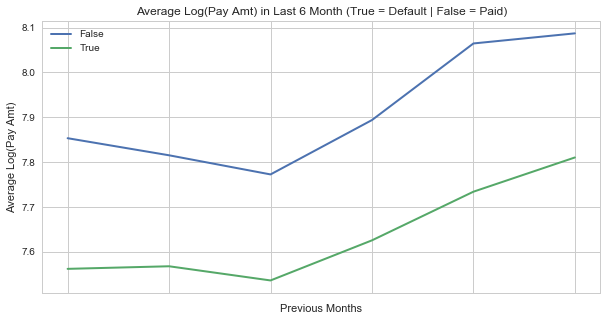

In [25]:
plotVar = ['PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default']
plotDF = df[plotVar]

meanDF = plotDF.groupby(by='default').mean().T.reset_index()
meanDF['Month'] = [9,8,7,6,5,4]
meanDF.columns = ['PreviousMonths', 'False', 'True', 'Month']
meanDF = meanDF.sort_values(by=['Month'], ascending=True)

meanDF.plot(x='PreviousMonths', y=['False', 'True'], figsize=(10,5), grid=True, lw = 2)
plt.title('Average Log(Pay Amt) in Last 6 Month (True = Default | False = Paid)')
plt.xlabel('Previous Months')
plt.ylabel('Average Log(Pay Amt)')

There does appear to be a difference in the median payment amount between the customers that defaulted and those that did not.

It appears that customers that did not default make higher payments against there credit on average than those that do default.

This leads us to question if customers that default are paying less, but maintain a similar bill amount then they are likely using a higher proportion of there credit. We will introduce a new feature that will measure the customer's credit usage in the 'New Features' section.

##### _Summary_

Based on the reviews of the features above it appears that we have several features that have a relationship to our target class. Additionally, we identified several limitations of our current features and have decided to include a several new features that could potentially improve our model.

### New Features

Based on the above analysis we believe we idenfied several new features that we will derive from our existing data. Below we explain the variable and the code used to create it.

##### _Bucketed Age Group_

This will allow us to pick up some of the traits of different age groups and life events. For example young adults (21-28) will likely have a different financial situation than a retiree.

In [26]:
# Creating Age Buckets
df['Agegroup'] = df['AGE']//10

##### _Credit Usage History_ 

Using the billed amounts relative to the total available credit for each of the customers gives us information on how much available credit they are using and carrying over month to month. This feature will allow us to determine how high consistently high credit usage effects a customer's likelihood of defaulting.

In [27]:
#calculate the credit usage values
df['USAGE_1'] = df['BILL_AMT1']/df['LIMIT_BAL']
df['USAGE_2'] = df['BILL_AMT2']/df['LIMIT_BAL']
df['USAGE_3'] = df['BILL_AMT3']/df['LIMIT_BAL']
df['USAGE_4'] = df['BILL_AMT4']/df['LIMIT_BAL']
df['USAGE_5'] = df['BILL_AMT5']/df['LIMIT_BAL']
df['USAGE_6'] = df['BILL_AMT6']/df['LIMIT_BAL']

##### _Late Payments Total_ 

How many times has a customer been late on a payment in the last six months? We saw in the section above that a history of late payments does appear to have a strong relationship with our target variable default.

In [28]:
transformVar = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for fi,feature in enumerate(transformVar):
    df[feature] = pd.cut(df[feature], [-3,-1,8], 2, labels=[0,1]).astype(np.int64)

df['TotalMonthsLate'] = df[transformVar].sum(axis=1)

### Exceptional Work

<font color='blue'>
_You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results._
</font>

In [29]:
#python code
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


# let's set those values to NaN, so that Pandas understand they are missing
df = df.replace(to_replace=-1,value=np.nan) # replace -1 with NaN (not a number)
print (df.info())
df.describe() # scroll over to see the values
















pca_features = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6','SEX']
df_pca = dfs[pca_features].astype(np.float64)

#Center means around 0
#Scale the data so all std dev = 1.
#Transpose so sample in rows rather than columns so we use .T to transpose
scaled_data = preprocessing.scale(df_pca.T)

#Include maybe only age.

#create a PCA object
pca=PCA()

#Calculate loading scores and variation each component accounts for
pca.fit(scaled_data)

#Generate Coords for the graph based on the loading scores and scaled data
pca_data=pca.transform(scaled_data)

#Look at things
#df_pca.head()
#print(pca)
#df_pca.dtypes
#pca_data is 22x22 matrix
#print(pca_data)
#print(df_pca)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 32 columns):
LIMIT_BAL          30000 non-null float64
SEX                30000 non-null int64
EDUCATION          30000 non-null int64
MARRIAGE           30000 non-null int64
AGE                30000 non-null int64
PAY_0              30000 non-null int64
PAY_2              30000 non-null int64
PAY_3              30000 non-null int64
PAY_4              30000 non-null int64
PAY_5              30000 non-null int64
PAY_6              30000 non-null int64
BILL_AMT1          27402 non-null float64
BILL_AMT2          26825 non-null float64
BILL_AMT3          26475 non-null float64
BILL_AMT4          26130 non-null float64
BILL_AMT5          25839 non-null float64
BILL_AMT6          25292 non-null float64
PAY_AMT1           24751 non-null float64
PAY_AMT2           24604 non-null float64
PAY_AMT3           24032 non-null float64
PAY_AMT4           23592 non-null float64
PAY_AMT5           23297 non-

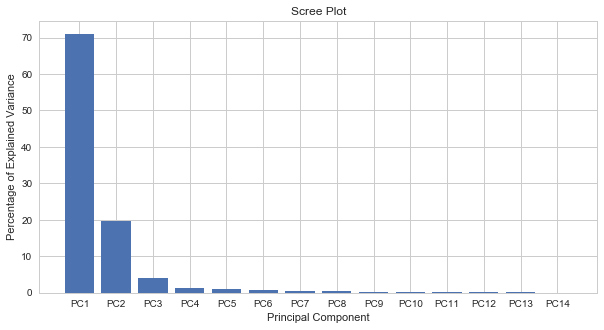

In [30]:
#Scree plot
plt.rcParams['figure.figsize'] = [10, 5]
#Calculate % that each comp accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

#Create labels
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#Create matplotlib bar (scree) plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

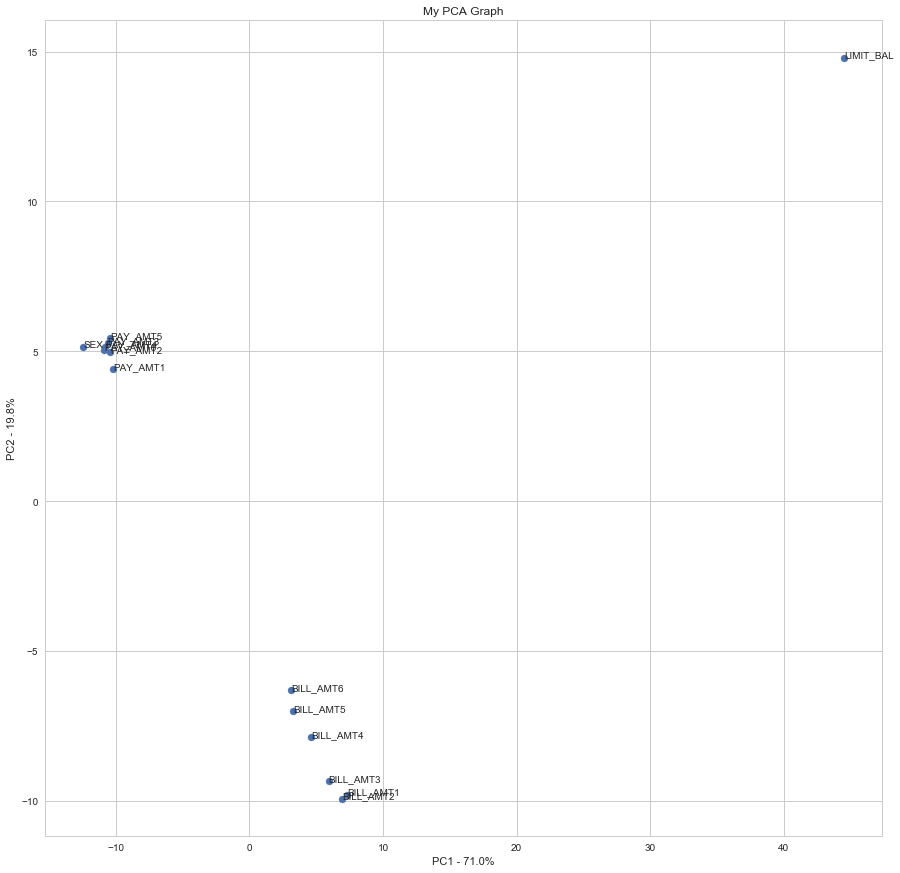

In [31]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
pca_df = pd.DataFrame(pca_data,index = [*pca_features],columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#add sample names to the graph
for sample in pca_df.index:
    #plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    #plt.figure(figsize=(18, 16))
    plt.show
    

### Appendix

#### Jupyter Formatting Cheatsheet
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
    


<font color='blue'> 
You are to perform analysis of a data set: exploring the statistical summaries of the features,
visualizing the attributes, and making conclusions from the visualizations and analysis. Follow the
CRISP-DM framework in your analysis (you are not performing all of the CRISP-DM outline, only
the portions relevant to understanding and visualization). This report is worth 20% of the final
grade. Please upload a report (one per team) with all code used, visualizations, and text in a single
document. The format of the document can be PDF, *.ipynb, or HTML. You can write the report in
whatever format you like, but it is easiest to turn in the rendered Jupyter notebook.

__A note on grading:__ This lab is mostly about visualizing and understanding your dataset. The
largest share of the points is from how you interpret the visuals that you make. Making the visuals
is not enough to satisfy each of the rubrics below—you should appropriately explain what the
implications of the visualizations are. In other words, expect about 20% of the available points for
visuals that have no substantive discussion.
</font>

In [32]:
import numba.cuda
import numpy as np
import math

my_gpu = numba.vectorize(df.AGE)
print (my_gpu)

<function vectorize.<locals>.wrap at 0x000002362713A620>
